# Lady Gaga Instagram Posts

## Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path


## DATA

In [2]:
current_path = Path.cwd()
data_dir = current_path.parent / 'data' / 'processed'
data = f'{data_dir}/instagram_ladygaga_2025-05-12_14-57-13_processed.csv'
df = pd.read_csv(data, sep=';')

In [3]:
df.head()

,post_id,caption,likes_count,media_url,date,time
0,3591166785212736472,LAST NIGHT iheart💔radio thanks for the innovat...,1034653,NaN,18-03-2025,17:54
1,3586126586446788087,MAYHEM vinyl is available at your local record...,464477,https://instagram.fdac5-2.fna.fbcdn.net/o1/v/t...,11-03-2025,19:13
2,3625179909652482815,Nothing could prepare me for the feeling I had...,4345411,NaN,04-05-2025,16:12
3,3597786369592240862,I truly can’t get enough of all of your “Abrac...,473578,https://scontent-iad3-2.cdninstagram.com/o1/v/...,27-03-2025,21:07
4,3596786733871926123,I wasn’t planning to tour this year after my s...,1451953,NaN,26-03-2025,12:00


In [5]:
df.dtypes

post_id         int64
caption        object
likes_count     int64
media_url      object
date           object
time           object
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [17]:
df = df.sort_values(by='likes_count')

In [9]:
# Generate bins 
bins_0_to_1m = list(range(0, 1_100_000, 100_000))

# in steps of 100,000
bins_1m_to_10m = list(range(1_100_000, 10_100_000, 100_000))

# Combine and add infinity
bins = bins_0_to_1m + bins_1m_to_10m + [float('inf')]

# Generate labels
labels = []
for i in range(len(bins) - 1):
    value = bins[i]
    if value < 1_000_000:
        # Format as "Xk" or "<Xk" for the first bin
        if value == 0:
            labels.append(f'<{bins[i+1] // 1000}k')
        else:
            labels.append(f'{value // 1000}k+')
    else:
        # Format as "X.Ymi+"
        millions = value / 1_000_000
        labels.append(f'{millions:.1f}mi+')

In [10]:
df['likes_count_cat'] = pd.cut(df['likes_count'], bins=bins, labels=labels, right=False)


## Visualization

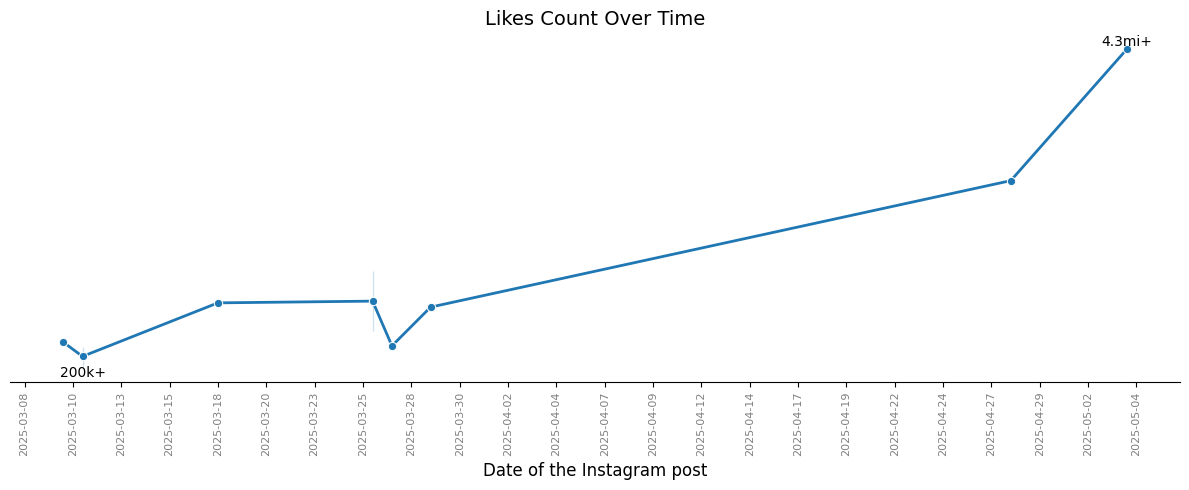

In [35]:
plt.figure(figsize=(12, 5))

# Add smooth line with markers
sns.lineplot(data=df, x='date', y='likes_count', marker='o', linewidth=2)

# Get the rows with the highest and lowest likes_count
max_row = df.loc[df['likes_count'].idxmax()]
min_row = df.loc[df['likes_count'].idxmin()]

# Add label for the max point
plt.text(max_row['date'], max_row['likes_count'], str(max_row['likes_count_cat']),
         ha='center', va='bottom', fontsize=10)

# Add label for the min point
plt.text(min_row['date'], min_row['likes_count'], str(min_row['likes_count_cat']),
         ha='center', va='top', fontsize=10)

# Title and axis settings
plt.title('Likes Count Over Time', fontsize=14)
plt.xlabel('Date of the Instagram post', fontsize=12)
plt.ylabel('')  # Remove Y-axis name
plt.yticks([])  # Remove Y-axis ticks
plt.xticks(rotation=90, color='gray', fontsize=8)
sns.despine(left=True)

# Improve the number of x-axis ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=30, prune=None))  # Show more ticks

plt.tight_layout()
plt.show()
